# Simple largest price drop program


Prerequisite:
- go to nintendo.com
- load all games you want
- view page source
- copy ul (class='game-list-results-container')
- paste to data.txt
- run script

In [1]:
from bs4 import BeautifulSoup

data = open('data.txt', 'r').read()
soup = BeautifulSoup(data, 'html.parser')

In [2]:
class save_data_object:
    def __init__(self, msrp, sale_price, name):
        self.msrp = float(msrp)
        self.sale_price = float(sale_price)
        self.price_drop = self.msrp - self.sale_price
        self.percent_drop = (self.msrp - self.sale_price)/self.msrp * 100
        self.name = name

In [3]:
result = soup.find_all("ul", {"class": "game-list-results-container"})
x = result[0].find_all('game-tile')
# x = soup.ul.find_all('game-tile')

In [4]:
# x[:1]

In [5]:
# x

In [6]:
#x[0].get('date')
def myfunc(n):
    return save_data_object(n.get('msrp')[1:], n.get('sale-price')[1:], n.h3.string)
x = list(map(myfunc, x))

In [7]:
def get_price_drop(n):
    return n.price_drop


x.sort(key=get_price_drop, reverse=True)

In [8]:
# for a in x:
#     print(a.name, ":" , a.msrp, "," , a.sale_price, ",", a.price_drop)

In [9]:
import pandas as pd

rows_list = []
for row in x:
        dict1 = {}
        dict1['name'] = row.name
        dict1['original_price'] = row.msrp
        dict1['discount_price'] = row.sale_price
        dict1['price_drop'] = row.price_drop
        dict1['percent_drop'] = row.percent_drop
        
        rows_list.append(dict1)
        
df = pd.DataFrame(data=rows_list, columns=['name', 'original_price', 'discount_price', 'price_drop', 'percent_drop'])


In [10]:
df.to_csv("./output/saved_data.csv")

In [11]:
df

,name,original_price,discount_price,price_drop,percent_drop
0,SUPER DRAGON BALL HEROES WORLD MISSION,59.99,8.99,51.00,85.014169
1,SUPER DRAGON BALL HEROES WORLD MISSION,59.99,8.99,51.00,85.014169
2,SWORD ART ONLINE: FATAL BULLET Complete Edition,59.99,9.59,50.40,84.014002
3,DRAGON BALL FIGHTERZ,59.99,9.59,50.40,84.014002
4,LEGO® DC Super-Villains,59.99,11.99,48.00,80.013336
...,...,...,...,...,...
817,Hardcore Maze Cube,2.49,1.99,0.50,20.080321
818,Stealth,4.98,4.48,0.50,10.040161
819,Super Jumpy Ball,4.99,4.49,0.50,10.020040
820,Snake vs Snake,3.99,3.59,0.40,10.025063


In [14]:
df.sort_values(by='percent_drop',ascending=False)

,name,original_price,discount_price,price_drop,percent_drop
22,ATV Drift & Tricks,34.99,1.99,33.0,94.312661
36,Syberia 2,29.99,1.99,28.0,93.364455
71,Sin Slayers,19.99,1.99,18.0,90.045023
83,Hard West,19.99,1.99,18.0,90.045023
68,Ultimate Fishing Simulator,19.99,1.99,18.0,90.045023
...,...,...,...,...,...
649,Sunless Skies: Sovereign Edition,24.99,22.49,2.5,10.004002
561,Layers of Fear 2,29.99,26.99,3.0,10.003334
422,Bakumatsu Renka SHINSENGUMI,49.99,44.99,5.0,10.002000
423,NINJA GAIDEN: Master Collection Deluxe Edition,49.99,44.99,5.0,10.002000


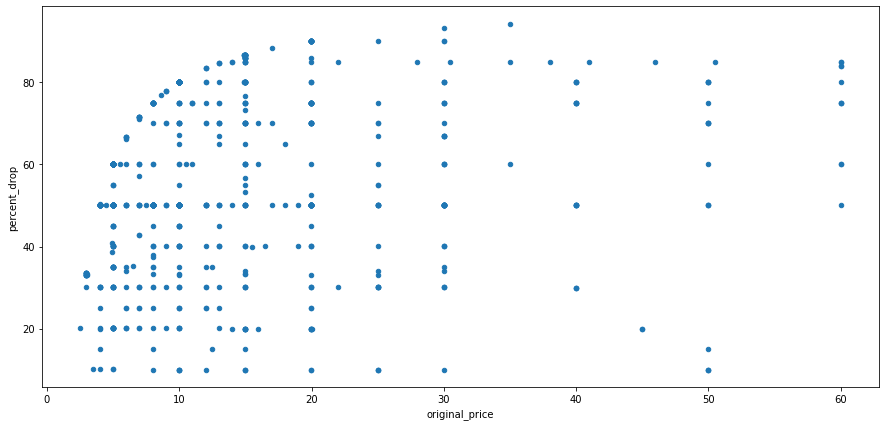

In [28]:
df.plot(x='original_price', y='percent_drop', figsize=(15,7), kind='scatter')

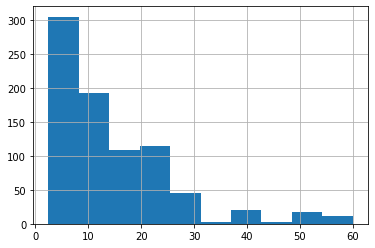

In [29]:
df['original_price'].hist()

In [31]:
df.plot(x='original_price', y='percent_drop', figsize=(15,7), kind='scatter')

<bound method PlotAccessor.pie of <pandas.plotting._core.PlotAccessor object at 0x1277c33d0>>